In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# The path to our CSV files
csv_path_2011 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
csv_path_2012 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
csv_path_2013 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
csv_path_2014 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
csv_path_2015 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"

population_path = "../data/NST-EST2017-01.csv"
df_pop = pd.read_csv(population_path)

# Read our data into pandas
df_2011 = pd.read_csv(csv_path_2011)
df_2011['year'] = '2011'
df_2012 = pd.read_csv(csv_path_2012)
df_2012['year'] = '2012'
df_2013 = pd.read_csv(csv_path_2013)
df_2013['year'] = '2013'
df_2014 = pd.read_csv(csv_path_2014)
df_2014['year'] = '2014'
df_2015 = pd.read_csv(csv_path_2015)
df_2015['year'] = '2015'

df = pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015])

In [16]:
df_pop

State USPS        2010        2011        2012        2013  \
0                Alabama   AL   4,785,579   4,798,649   4,813,946   4,827,660   
1                 Alaska   AK     714,015     722,259     730,825     736,760   
2                Arizona   AZ   6,407,002   6,465,488   6,544,211   6,616,124   
3               Arkansas   AR   2,921,737   2,938,640   2,949,208   2,956,780   
4             California   CA  37,327,690  37,672,654  38,019,006  38,347,383   
5               Colorado   CO   5,048,029   5,116,411   5,186,330   5,262,556   
6            Connecticut   CT   3,580,171   3,591,927   3,597,705   3,602,470   
7               Delaware   DE     899,712     907,884     916,868     925,114   
8   District of Columbia   DC     605,040     620,336     635,630     650,114   
9                Florida   FL  18,846,461  19,097,369  19,341,327  19,584,927   
10               Georgia   GA   9,712,696   9,810,595   9,911,171   9,981,773   
11                Hawaii   HI   1,363,817   1,378,323   1,392,772   1,408,038   
12                 Idaho   ID   1,570,912   1,583,180   1,594,673   1,610,187   
13              Illinois   IL  12,841,196  12,862,298  12,878,494  12,890,403   
14               Indiana   IN   6,490,029   6,515,358   6,535,665   6,567,484   
15                  Iowa   IA   3,050,223   3,063,690   3,074,386   3,089,876   
16                Kansas   KS   2,858,403   2,868,756   2,885,316   2,892,900   
17              Kentucky   KY   4,347,948   4,368,505   4,383,673   4,399,121   
18             Louisiana   LA   4,544,871   4,574,388   4,602,681   4,626,795   
19                 Maine   ME   1,327,568   1,327,968   1,328,101   1,327,975   
20              Maryland   MD   5,788,099   5,843,115   5,891,680   5,932,654   
21         Massachusetts   MA   6,564,943   6,612,178   6,659,627   6,711,138   
22              Michigan   MI   9,876,731   9,876,199   9,886,610   9,899,219   
23             Minnesota   MN   5,310,711   5,345,967   5,377,695   5,416,074   
24           Mississippi   MS   2,970,437   2,977,452   2,982,963   2,987,721   
25              Missouri   MO   5,995,681   6,010,280   6,023,267   6,041,142   
26               Montana   MT     990,507     996,866   1,003,522   1,011,921   
27              Nebraska   NE   1,829,956   1,841,641   1,854,862   1,867,414   
28                Nevada   NV   2,702,797   2,718,170   2,752,410   2,786,547   
29         New Hampshire   NH   1,316,700   1,318,345   1,320,923   1,322,622   
30            New Jersey   NJ   8,803,708   8,844,694   8,882,095   8,913,735   
31            New Mexico   NM   2,064,607   2,077,744   2,083,590   2,085,161   
32              New York   NY  19,405,185  19,526,372  19,625,409  19,712,514   
33        North Carolina   NC   9,574,247   9,662,940   9,755,299   9,849,812   
34          North Dakota   ND     674,518     684,830     701,380     722,908   
35                  Ohio   OH  11,539,282  11,543,332  11,546,969  11,567,845   
36              Oklahoma   OK   3,759,529   3,785,232   3,815,298   3,849,840   
37                Oregon   OR   3,837,073   3,865,845   3,893,920   3,919,664   
38          Pennsylvania   PA  12,711,063  12,742,811  12,768,034  12,778,450   
39           Puerto Rico   PR   3,721,525   3,678,732   3,634,488   3,593,077   
40          Rhode Island   RI   1,053,169   1,052,154   1,052,761   1,052,784   
41        South Carolina   SC   4,635,834   4,672,744   4,719,009   4,765,862   
42          South Dakota   SD     816,227     823,338     832,576     842,513   
43             Tennessee   TN   6,355,882   6,396,281   6,450,632   6,490,795   
44                 Texas   TX  25,241,648  25,644,424  26,078,327  26,479,279   
45                  Utah   UT   2,775,260   2,815,430   2,854,222   2,899,961   
46               Vermont   VT     625,842     626,210     625,606     626,044   
47              Virginia   VA   8,025,206   8,107,548   8,188,656   8,261,689   
48            Washington   WA   6,741,386   6,819,

In [17]:
# just to show original DRGs
drg_titles = set(df['DRG Definition'].unique())
print(len(drg_titles),drg_titles)

598 {'154 - OTHER EAR, NOSE, MOUTH & THROAT DIAGNOSES W MCC', '669 - TRANSURETHRAL PROCEDURES W CC', '114 - ORBITAL PROCEDURES W/O CC/MCC', '853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC', '383 - UNCOMPLICATED PEPTIC ULCER W MCC', '615 - ADRENAL & PITUITARY PROCEDURES W/O CC/MCC', '927 - EXTENSIVE BURNS OR FULL THICKNESS BURNS W MV 96+ HRS W SKIN GRAFT', '481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W CC', '653 - MAJOR BLADDER PROCEDURES W MCC', '489 - KNEE PROCEDURES W/O PDX OF INFECTION W/O CC/MCC', '920 - COMPLICATIONS OF TREATMENT W CC', '334 - RECTAL RESECTION W/O CC/MCC', '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC', '249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT W/O MCC', '909 - OTHER O.R. PROCEDURES FOR INJURIES W/O CC/MCC', '491 - BACK & NECK PROC EXC SPINAL FUSION W/O CC/MCC', '625 - THYROID, PARATHYROID & THYROGLOSSAL PROCEDURES W MCC', '552 - MEDICAL BACK PROBLEMS W/O MCC', '605 - TRAUMA TO THE SKIN, SUBCUT TISS & BREAST W/O MCC', '037 - EXTRACR

In [18]:
#cleaning DRG titles to create 'mod_DRG Definition' series
patterns= [' W/O CC/MCC',' W/O MCC',' W MCC', ' W CC', ' MCC', '/MCC']
df['step1_mod_DRG Definition'] = df['DRG Definition'].replace(patterns, "", regex=True)
# knock off 'xxx - ', always 3 digits + ' - '
df['mod_DRG Definition'] = df['step1_mod_DRG Definition'].apply(lambda x : x[6:])

#
df.drop(df['step1_mod_DRG Definition'])

DRG Definition  Provider Id  \
0                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
5                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10023   
6                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10029   
7                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10033   
8                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10039   
9                039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10040   
10               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10046   
11               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10055   
12               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10056   
13               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10078   
14               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10083   
15               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10085   
16               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10090   
17               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10092   
18               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10100   
19               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10103   
20               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10104   
21               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10113   
22               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10139   
23               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        20017   
24               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30002   
25               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30006   
26               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30007   
27               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30010   
28               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30011   
29               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30012   
...                                                   ...          ...   
201846  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       260183   
201847  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       310012   
201848  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       310064   
201849  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       310111   
201850  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       310113   
201851  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       330101   
201852  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       340002   
201853  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       340030   
201854  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       340061   
201855  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       340113   
201856  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       340141   
201857  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       360180   
201858  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       370008   
201859  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       390067   
201860  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       390111   
201861  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       390133   
201862  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       390139   
201863  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       390164   
201864  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       390174   
201865  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       440049   
201866  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       450021   
201867  988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRI...       450054   
201868  988 - NON-EXTENSIVE O.R. PROC UNRELATED

In [19]:
print(len(df['mod_DRG Definition'].unique()),df['mod_DRG Definition'].unique())

309 ['EXTRACRANIAL PROCEDURES' 'DEGENERATIVE NERVOUS SYSTEM DISORDERS'
 'INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION' 'TRANSIENT ISCHEMIA'
 'CRANIAL & PERIPHERAL NERVE DISORDERS' 'SEIZURES' 'DYSEQUILIBRIUM'
 'PULMONARY EMBOLISM' 'RESPIRATORY INFECTIONS & INFLAMMATIONS'
 'PULMONARY EDEMA & RESPIRATORY FAILURE'
 'CHRONIC OBSTRUCTIVE PULMONARY DISEASE' 'SIMPLE PNEUMONIA & PLEURISY'
 'BRONCHITIS & ASTHMA'
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS'
 'MAJOR CARDIOVASC PROCEDURES' 'PERMANENT CARDIAC PACEMAKER IMPLANT'
 'PERC CARDIOVASC PROC W DRUG-ELUTING STENT OR 4+ VESSELS/STENTS'
 'PERC CARDIOVASC PROC W DRUG-ELUTING STENT'
 'PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT'
 'PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT'
 'OTHER VASCULAR PROCEDURES'
 'ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE'
 'CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH' 'HEART FAILURE & SHOCK'
 'PERIPHERAL VASCULAR DISORDERS' 'AT

In [20]:
df.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code  \
0             AL              36301   
1             AL              35957   
2             AL              35631   
3             AL              35235   
4             AL              35007   

  Hospital Referral Region (HRR) Description  Total Discharges  \
0                                AL - Dothan                91   
1                            AL - Birmingham                14   
2                            AL - Birmingham                24   
3                            AL - Birmingham                25   
4                            AL - Birmingham                18   

   Average Covered Charges  Average Total Payments  Average Medicare Payments  \
0              32963.07692             5777.241758                4763.736264   
1              15131.85714             5787.571429                4976.714286   
2              37560.37500             5434.958333                4453.791667   
3              13998.28000             5417.560000                4129.160000   
4              31633.27778             5658.333333                4851.444444   

   year       step1_mod_DRG Definition       mod_DRG Definition  
0  2011  039 - EXTRACRANIAL PROCEDURES  EXTRACRANIAL PROCEDURES  
1  2011  039 - EXTRACRANIAL PROCEDURES  EXTRACRANIAL PROCEDURES  
2  2011  039 - EXTRACRANIAL PROCEDURES  EXTRACRANIAL PROCEDURES  
3  2011  039 - EXTRACRANIAL PROCEDURES  EXTRACRANIAL PROCEDURES  
4  2011  039 - EXTRACRANIAL PROCEDURES  EXTRACRANIAL PROCEDURES

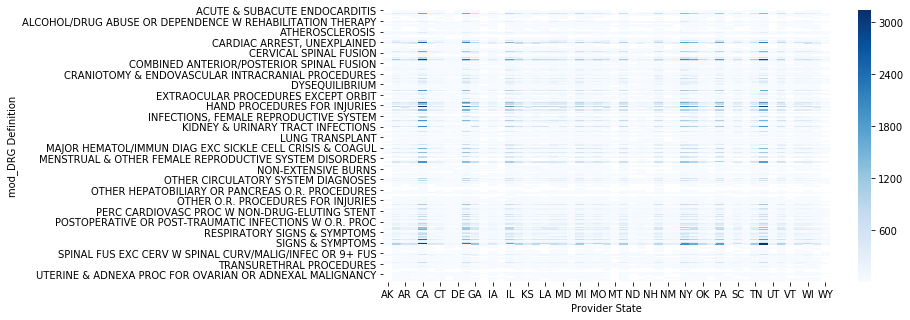

In [24]:
# df.to_csv('../data/data.csv')

drgs = df.groupby(['mod_DRG Definition','Provider State'])
drgs_per_state = drgs['Provider State'].count()
drgs_per_state_table = drgs_per_state.unstack('Provider State')

f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(drgs_per_state_table, cmap='Blues');


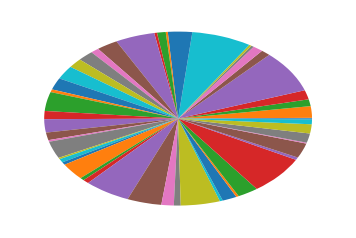